<a href="https://colab.research.google.com/github/assulthoni/DTI-assignment/blob/main/Pie_Sales_Analysis_And_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pie Sales Analysis And Regression

## Description of Notebook

This notebook done by Ahmad Shohibus Sulthoni (me) who are student at Telkom University. I made this notebook to fulfill weekly assigment of Digital Talent Incubator (DTI) Program which supported by Telkom Indonesia tbk.

**List of Contents**


1.   Research Question (What we want to solve?)
2.   Methodology (How we solve that question?)
3.   Exploratory Data Analysis (What insight that can we get from data?)
4.   Modeling (How Machine Learning solve that problem?)
5.   Evaluation (How model's performance?)
6.   Inference (What's next that we can do?)



## Research Question



**Description of data that used in this notebook**

Data that used in this notebook come from sales domain. In this data contains how week sell, advertisement budget, pie price and pie sales. 

**Column**

*   week (number) : n-th week of selling pie
*   pie_sales (number) : total pie sold out in that week
*   price (number) : price of each pie
*   advertising (number) : budget of advertising

**Problem**

1.   The seller want to know how week, price and advertising incluence pie sales.
2.   The seller want to make model using multi linear regression in order to implement Machine Learning for decision making

## Methodology

I use descriptive statistics to know how pie sales dependent on week, price and advertising. After that i use multi linear regression to make model. For the evaluation i use regression summary, some metrics such r2, t-value, confidence interval include in it.

**Tools**


*   Python Language Programming
*   Google Colab Notebook
*   Some python libraries (statsmodels, sklearn, pandas, matplotlib)



### Library and Data Preparation

In [95]:
# import library for code
import warnings

warnings.filterwarnings('ignore') #ignore warnings for convenience
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [76]:
DATA_URL = 'https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv'

df_pie_sales = pd.read_csv(DATA_URL, sep=';')
df_pie_sales.sample(5)

,week,pie_sales,price,advertising
1,2,460,7.5,3.3
12,13,440,5.9,4.0
8,9,450,7.0,3.5
13,14,450,5.0,3.5
9,10,490,5.0,4.0


## Exploratory Data Analysis

### Correlation plot all columns

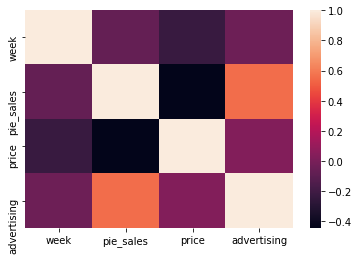

In [77]:
# all columns correlation plot
corr = df_pie_sales.corr()

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr)

### Sales Distribution

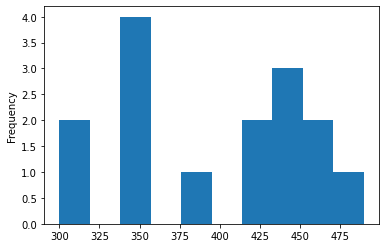

In [78]:
# plot sales distribution
df_pie_sales['pie_sales'].plot(kind='hist')

### Week - sales Analysis

In [79]:
# find correlation of week and sales
corr = df_pie_sales['week'].corr(df_pie_sales['pie_sales'])
print(f'correlation of week and pie is : {corr}')

correlation of week and pie is : -0.0678869266923971


Text(0, 0.5, 'Sales')

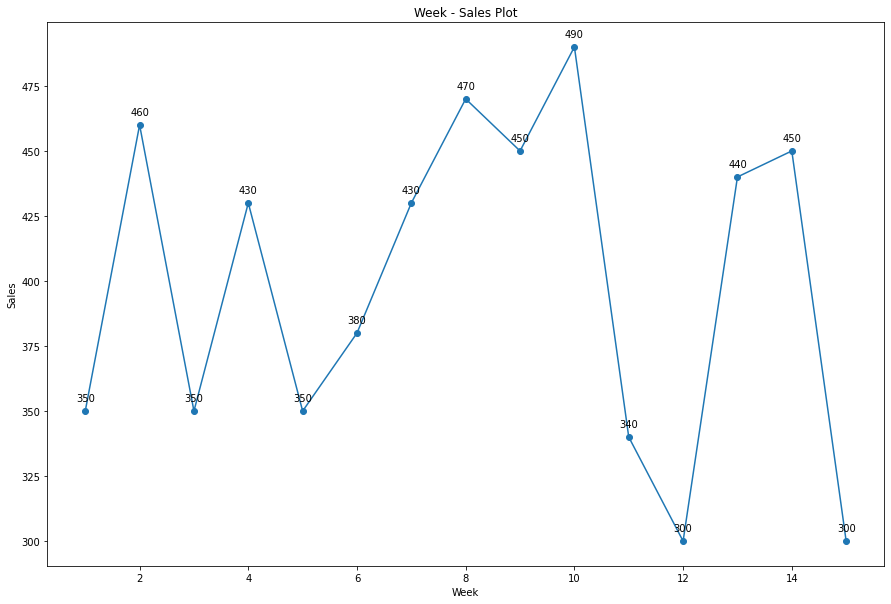

In [80]:
# plot graph between week and sales
xs = df_pie_sales['week']
ys = df_pie_sales['pie_sales']
plt.figure(figsize=(15,10))
plt.plot(xs,ys, 'o-')
for x,y in zip(xs,ys):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title("Week - Sales Plot")
plt.xlabel("Week")
plt.ylabel("Sales")

### Price - sales Analysis


In [81]:
# find correlation of price and sales
corr = df_pie_sales['price'].corr(df_pie_sales['pie_sales'])
print(f'correlation of price and pie sales is : {corr}')

correlation of price and pie sales is : -0.4432731827387206


Text(0, 0.5, 'Sales')

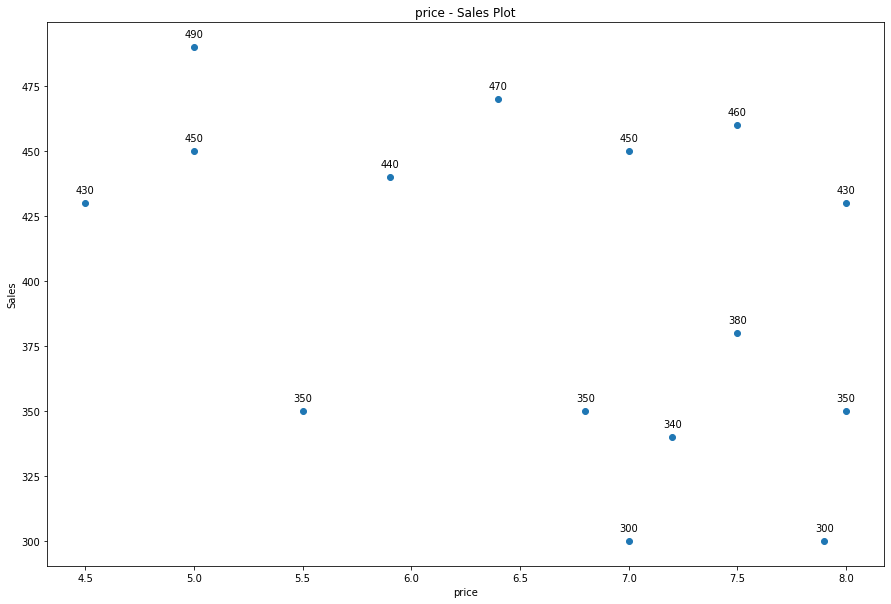

In [82]:
# plot graph between price and sales
xs = df_pie_sales['price']
ys = df_pie_sales['pie_sales']
plt.figure(figsize=(15,10))
plt.scatter(xs,ys)
for x,y in zip(xs,ys):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title("price - Sales Plot")
plt.xlabel("price")
plt.ylabel("Sales")

### advertising - sales Analysis

In [83]:
# find correlation of advertising and sales
corr = df_pie_sales['advertising'].corr(df_pie_sales['pie_sales'])
print(f'correlation of advertising and pie sales is : {corr}')

correlation of advertising and pie sales is : 0.556319857168117


Text(0, 0.5, 'Sales')

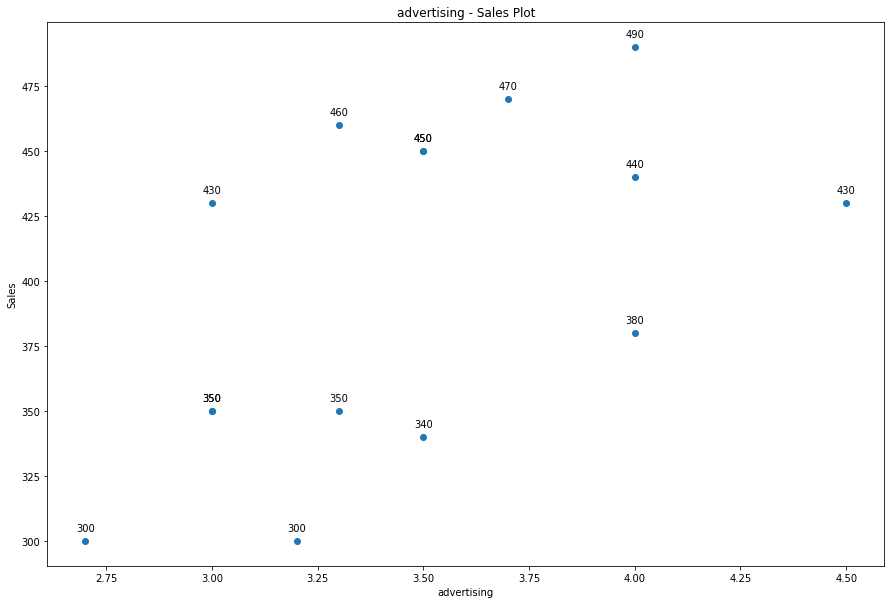

In [84]:
# plot graph between advertising and sales
xs = df_pie_sales['advertising']
ys = df_pie_sales['pie_sales']
plt.figure(figsize=(15,10))
plt.scatter(xs,ys)
for x,y in zip(xs,ys):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title("advertising - Sales Plot")
plt.xlabel("advertising")
plt.ylabel("Sales")

### Conclusion of EDA

*   Week has slightly negative correlation with Sales
*   price has negative correlation with Sales
*   advertising has positive correlation with sales 
*   sales has bimodal distribution



## Modeling

### Use Scikit-learn

In [85]:
X_variable = ['week', 'advertising', 'price']
y_variable = ['pie_sales']
X = df_pie_sales[X_variable]
y = df_pie_sales[y_variable]
display(X.head())
display(y.head())

,week,advertising,price
0,1,3.3,5.5
1,2,3.3,7.5
2,3,3.0,8.0
3,4,4.5,8.0
4,5,3.0,6.8


,pie_sales
0,350
1,460
2,350
3,430
4,350


In [86]:
regressor = linear_model.LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 [339.79655586]
Coefficients: 
 [[ -2.25541919  73.46399119 -26.92659652]]


### Use stasmodels

In [88]:
X_variable = ['week', 'advertising', 'price']
y_variable = ['pie_sales']
X = df_pie_sales[X_variable]
y = df_pie_sales[y_variable]

# add constant for intercept because 
# An intercept is not included by default and should be added by the user
X_sm = sm.add_constant(X) 

In [89]:
regressor_sm = sm.OLS(y,X_sm)
results = regressor_sm.fit()
# intercept and coefficients of model
display(results.params)

const          339.796556
week            -2.255419
advertising     73.463991
price          -26.926597
dtype: float64

In [90]:
# t-value for each component
display(results.tvalues)

const          2.734086
week          -0.760104
advertising    2.777346
price         -2.378086
dtype: float64

### Hypothesis Formula

Because we have 3 independent variable, so we have 3 $\beta$

Then,
Basic formula :
>$y=\beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + \beta_3 * x_3 + \varepsilon$


which $\beta_0$ is intercept, $\beta_1,\beta_2,\beta_3$ are coefficients and $\varepsilon$ is random error.



*   $x_1$ is week
*   $x_2$ is advertising
*   $x_3$ is price



So we have

Best fitted formula for Regression :

>$y=339.79655586 + -2.25541919*x_1 + 73.46399119*x_2 + -26.92659652 * x_3 + \varepsilon$

## Evaluation

In [91]:
# summary of model
display(results.summary())
# predict seen data
y_pred = regressor.predict(X)
mse = mean_squared_error(y,y_pred)
print(f'RMSE : {np.sqrt(mse)}')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pie_sales   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     4.398
Date:                Sat, 17 Oct 2020   Prob (F-statistic):             0.0290
Time:                        20:06:05   Log-Likelihood:                -77.126
No. Observations:                  15   AIC:                             162.3
Df Residuals:                      11   BIC:                             165.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         339.7966    124.282      2.734      0.019      66.255     613.339
week           -2.2554      2.967     -0.760      0.463      -8.786       4.275
advertising    73.4640     26.451      2.777      0.018      15.245     131.683
price         -26.9266     11.323     -2.378      0.037     -51.848      -2.005
==============================================================================
Omnibus:                        0.393   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.821   Jarque-Bera (JB):                0.168
Skew:                           0.232   Prob(JB):                        0.920
Kurtosis:                       2.768   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

RMSE : 41.37976937444013


So we can know that :


1.   Model is not really good because $r^2$ evaluation is 0.545 and RMSE around 41.379
2.   Variance in independent variable is too much so model can't fitted well
3.   Both scikit-learn and statsmodels return same coeff, so for linear regression we can use both of them



## Inference

I make basic inferencing of model. Please run cell below with your custom input. You can change any independent variable (X) at the right side. HAVE FUN!

In [94]:
#@title independent variable input
week = 19 #@param {type:"slider", min:15, max:52, step:1}
advertising =  3#@param {type:"number"}
price = 10 #@param {type:"number"}
print("Prediction will show below.")
ind_var = {
    'week' : week,
    'advertising' : advertising,
    'price' : price
   }
X_inf = pd.DataFrame(data=ind_var, columns=X_variable, index=[0])
y_inf = regressor.predict(X_inf)
X_inf['pie sales'] = y_inf
display(X_inf)
print(f'Predictions of pie sales in this inferencing is {y_inf[0][0]}')
#@markdown RUN THIS CELL AGAIN WITH OTHER CUSTOM INPUT

Prediction will show below.


,week,advertising,price,pie sales
0,19,3,10,248.0696


Predictions of pie sales in this inferencing is 248.06959960238686
